In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv('../generate_test_data/answers.csv')
df

,Ac02,Ac03,Ac06,Ac10,Ac13,Ec01,Ec03,Ec05,Fa02,Fa03,...,Mo10,Mo11,Sa01,Sa02,Sa03,Sa04,So01,So04,So07,So08
0,4,2,2,5,1,2,2,4,1,5,...,1,5,5,2,2,1,5,3,2,3
1,3,3,3,4,4,3,5,4,1,2,...,2,2,4,2,3,5,3,5,5,4
2,3,2,5,2,4,5,3,5,2,1,...,4,5,1,4,4,1,4,4,4,1
3,5,1,3,2,2,4,3,1,1,3,...,2,2,3,5,3,3,4,1,1,2
4,4,5,4,3,2,4,4,3,4,5,...,1,4,1,5,2,1,3,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,5,2,1,4,1,4,5,3,2,5,...,2,5,1,4,5,5,1,3,2,5
709,2,5,1,4,3,1,2,5,2,3,...,5,4,2,1,5,4,2,3,4,5
710,1,2,5,5,4,3,4,1,5,4,...,2,3,5,1,3,1,3,4,5,5
711,1,4,1,5,2,4,5,1,5,3,...,5,1,5,1,3,4,1,2,4,-1


In [3]:

y = (df['In02'] + df['In03'] + df['In04'] + df['In05'])/20

In [4]:

headers = ['Ac02','Ac03','Ac06','Ac10','Ac13','Ec01','Ec03','Ec05','Fa02','Fa03','Fa07','Fa08','Fa09','Mo02','Mo08','Mo09','Mo10','Mo11','Sa01','Sa02','Sa03','Sa04','So01','So04','So07','So08']
X = df[headers]
X.head()

,Ac02,Ac03,Ac06,Ac10,Ac13,Ec01,Ec03,Ec05,Fa02,Fa03,...,Mo10,Mo11,Sa01,Sa02,Sa03,Sa04,So01,So04,So07,So08
0,4,2,2,5,1,2,2,4,1,5,...,1,5,5,2,2,1,5,3,2,3
1,3,3,3,4,4,3,5,4,1,2,...,2,2,4,2,3,5,3,5,5,4
2,3,2,5,2,4,5,3,5,2,1,...,4,5,1,4,4,1,4,4,4,1
3,5,1,3,2,2,4,3,1,1,3,...,2,2,3,5,3,3,4,1,1,2
4,4,5,4,3,2,4,4,3,4,5,...,1,4,1,5,2,1,3,2,3,1


## Regresion Lineal

In [5]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

LinearRegression()

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = linear_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.01
R-squared: 0.57


In [8]:
import statsmodels.api as sm


X_train_sm = sm.add_constant(X_train)


sm_model = sm.OLS(y_train, X_train_sm).fit()


print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     52.66
Date:                Thu, 12 Sep 2024   Prob (F-statistic):          3.07e-130
Time:                        00:08:44   Log-Likelihood:                 618.80
No. Observations:                 570   AIC:                            -1184.
Df Residuals:                     543   BIC:                            -1066.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6275      0.058     10.799      0.0

## Regression Tree Classifier

In [9]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [10]:
from sklearn.tree import export_graphviz
export_graphviz(
tree_reg,
out_file='desertion_regression.dot',
feature_names=headers,
rounded=True,
filled=True
)

In [11]:
from graphviz import Source
Source.from_file('desertion_regression.dot')

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [12]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = tree_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Error cuadratico medio (MSE): {mse:.2f}")
print(f"Raiz del error Cuadratico Medio (RMSE): {rmse:.2f}")

Error cuadratico medio (MSE): 0.01
Raiz del error Cuadratico Medio (RMSE): 0.10


In [13]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Error Medio Absoluto (MAE): {mae:.2f}")

Error Medio Absoluto (MAE): 0.06


In [14]:
y_train_pred = tree_reg.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"Training RMSE: {rmse_train:.2f}")

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Testing RMSE: {rmse_test:.2f}")

Training RMSE: 0.07
Testing RMSE: 0.10


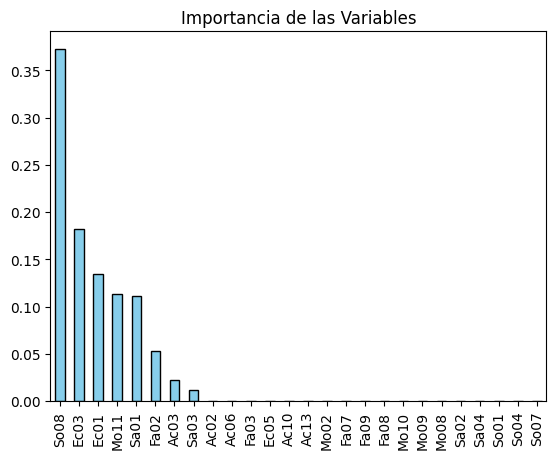

In [15]:
importances = tree_reg.feature_importances_

feature_importances = pd.Series(importances, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Importancia de las Variables')

plt.savefig('importances.png', format='png', bbox_inches='tight') 

plt.show() 

In [16]:
# Guardar las predicciones en un archivo CSV
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Previsto': y_pred
})
predictions_df.to_csv('../predicciones.csv', index=False)
